# Image Classification

The idea behind this project is to build a deep learning-based Image Classification model on images that will be scraped from e-commerce portal. This is done to make the model more and more robust. 


## Importing Libraries

In [1]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
import numpy as np
import cv2 as cv2
import os

In [2]:
print(tf.__version__)

2.4.0


## Loading data 

In [3]:
Data = "C:/Users/sai/Dress"

In [4]:
Call_names = ["saree", "trouser", "jeans"]

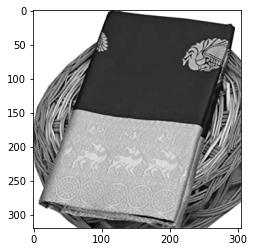

In [5]:
for category in Call_names:                                               # saree, trouser and jeans
    path = os.path.join(Data,category)                                    # create path for saree, trouser and jeans
    for img in os.listdir(path):                                          # iterate over each image per saree, trouser and jeans
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # converting image into an array
        plt.imshow(img_array, cmap='gray')                                    # using imshow plotting a graph 
        plt.show()                                                            # display!
        break                                                                 # considering one for now so break
    break  

In [6]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [7]:
print(img_array.shape)             # shape of the image

(320, 305)


So that's a 320 tall, 305 wide

In [8]:
#dimensions of the images

img_width, img_height = 50,50

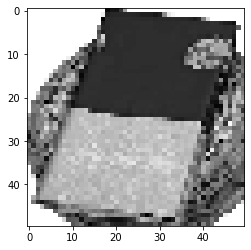

In [9]:
new_array = cv2.resize(img_array, (img_width, img_height))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in Call_names:                                       # saree, trouser and jeans
        path = os.path.join(Data,category)                            # create path for saree, trouser and jeans
        class_num = Call_names.index(category)                        # getting the classification 0=saree, 1=trouser, 2=jeans

        for img in tqdm(os.listdir(path)):                            # iterate over each image per saree, trouser and jeans
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)   # converting image into an array
                new_array = cv2.resize(img_array, (img_width, img_height))             # resize to normalize data size
                training_data.append([new_array, class_num])                           # add this to our training_data
            except Exception as e:                                                     # keeping the output clean
                pass

create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 752.02it/s]

1440


We need to shuffle the data.

Right now our data is just all sarees, trousers and then all cats. 

This will usually wind up causing trouble too, Initially, the classifier will learn to just predict saree always, then it will shift and just predict all trousers.

So we can solve this by shuffling the input data.

In [11]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
1
1
2
0
1


We've got the classes shuffled in!

## Lets pack this data into a variables before feeding it to the model

In [13]:
data_x = []                          # for images 
data_y = []                          # for labels

for image,label in training_data:    
    data_x.append(image)
    data_y.append(label)

data_x = np.array(data_x).reshape(-1, img_width, img_height, 1)
data_y = np.array(data_y)

## Lets save these data using pickle it will be easy to call for modeling

In [14]:
import pickle

pickle_out = open("data_x.pickle","wb")
pickle.dump(data_x, pickle_out)
pickle_out.close()

pickle_out = open("data_y.pickle","wb")
pickle.dump(data_y, pickle_out)
pickle_out.close()

# Loading the data using pickle

In [15]:
pickle_in = open("data_x.pickle","rb")
data_x = pickle.load(pickle_in)

pickle_in = open("data_y.pickle","rb")
data_y = pickle.load(pickle_in)

We've got out dataset, we're ready to work on convolutional neural networks and implement one with our data for classification.

# Normalizing the data

Before feeding the data to the Neural Network.

We need to normailize the data, easiest way to do that is by scaling the data.

Here we know pixel valuee for max is 255 and min value is 0.

We will be dividing the data by 255.

In [16]:
data_x = data_x/255.0

# Building Model

## Create the convolutional base

In [17]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=data_x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## Add Dense layers on top

In [18]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

## Here's the complete architecture of our model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

## model compile

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Model Fitting

In [27]:
model.fit(data_x, data_y, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
41/41 [==============================] - 45s 1s/step - loss: -111188338.6667 - accuracy: 0.3634 - val_loss: -97123624.0000 - val_accuracy: 0.4097
Epoch 2/5
41/41 [==============================] - 40s 986ms/step - loss: -141694002.8571 - accuracy: 0.3608 - val_loss: -125302728.0000 - val_accuracy: 0.4097
Epoch 3/5
41/41 [==============================] - 42s 1s/step - loss: -202635712.3810 - accuracy: 0.3606 - val_loss: -157874608.0000 - val_accuracy: 0.4167
Epoch 4/5
41/41 [==============================] - 45s 1s/step - loss: -221912251.4286 - accuracy: 0.3533 - val_loss: -198023104.0000 - val_accuracy: 0.4097
Epoch 5/5
41/41 [==============================] - 39s 932ms/step - loss: -252304163.0476 - accuracy: 0.3717 - val_loss: -243160288.0000 - val_accuracy: 0.4097
